In [1]:
from tensorflow.keras.datasets import mnist

### 손글씨 데이터 로딩

In [2]:
((X_train,y_train),(X_test,y_test)) = mnist.load_data()

In [3]:
# 손글씨 사진 데이터
# 60000: 데이터의 수
# 28 X 28 사진 데이터
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

#### 데이터 확인

In [5]:
import matplotlib.pyplot as plt

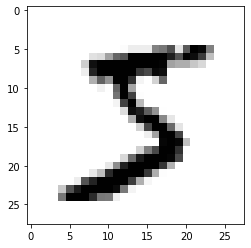

In [6]:
# cmap = plt.cm.binary : 색상 > 흑백
plt.imshow(X_train[0], cmap = plt.cm.binary)

In [7]:
# 0 ~ 255까지의 숫자로 이루어져 있음
# 0이 흰색
# 255가 검은색
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
# 기계는 0과 1사이의 숫자를 좋아함
# 0 ~ 255까지의 숫자를 0 ~ 1까지로 만들어줌 
# 전체 데이터를 255로 나눠줌
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [9]:
# 28 X 28의 2차원 데이터를 784의 1차원 데이터로 만들어줄 필요가 있음
# input_dim에 집어넣기 위해서 !
X_train = X_train.reshape((60000,28*28))
X_test = X_test.reshape((10000,784))

In [10]:
X_train[0].shape

(784,)

In [11]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [12]:
# 정답 데이터 원핫 인코딩
import pandas as pd 
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [13]:
# 입력층 개수: 784
# 출력층 개수: 10

In [14]:
import tensorflow as tf
seed = 100
np.random.seed(seed)
tf.random.set_seed(seed)

In [15]:
# 모델설계
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
# 입력층, 중간층의 활성화 함수: sigmoid
#입력층
model.add(Dense(units=1000, input_dim=784, activation='sigmoid' ))
#중간층
model.add(Dense(units= 500, activation='sigmoid'))
model.add(Dense(units=250, activation = 'sigmoid'))
model.add(Dense(units=125, activation = 'sigmoid'))
model.add(Dense(units=60, activation = 'sigmoid'))
model.add(Dense(units=30, activation = 'sigmoid'))
model.add(Dense(units=15, activation ='sigmoid'))
# 출력층의 활성화함수: softmax
model.add(Dense(units=10,activation ='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              785000    
_________________________________________________________________
dense_1 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_2 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_3 (Dense)              (None, 125)               31375     
_________________________________________________________________
dense_4 (Dense)              (None, 60)                7560      
_________________________________________________________________
dense_5 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_6 (Dense)              (None, 15)                4

In [17]:
# 모델 학습 방법 설정
# loss = categorical_crossentropy
# optimizer = 'adam'
# metrics = accracy
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics = ['accuracy'])

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000, 10), (10000, 10))

In [19]:
# 모델 학습
# epochs = 20 
history1 = model.fit(X_train,y_train,epochs=20, validation_data=[X_test,y_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 70us/sample - loss: 1.7512 - accuracy: 0.3083 - val_loss: 1.2732 - val_accuracy: 0.4655
Epoch 2/20
60000/60000 [==============================] - 3s 53us/sample - loss: 1.0889 - accuracy: 0.5533 - val_loss: 0.8565 - val_accuracy: 0.8017
Epoch 3/20
60000/60000 [==============================] - 3s 53us/sample - loss: 0.5088 - accuracy: 0.8564 - val_loss: 0.3563 - val_accuracy: 0.9430
Epoch 4/20
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2513 - accuracy: 0.9547 - val_loss: 0.1890 - val_accuracy: 0.9630
Epoch 5/20
60000/60000 [==============================] - 3s 53us/sample - loss: 0.1539 - accuracy: 0.9683 - val_loss: 0.1962 - val_accuracy: 0.9565
Epoch 6/20
60000/60000 [==============================] - 3s 53us/sample - loss: 0.1107 - accuracy: 0.9753 - val_loss: 0.1360 - val_accuracy: 0.9685
Epoch 7/20
60000/60000 [==============================] 

In [20]:
# 모델 평가
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 37us/sample - loss: 0.1186 - accuracy: 0.9784


[0.11864594642966986, 0.9784]

In [21]:
# 모든 조건은 동일 
# model2라는 딥러닝 모델 설계
# 입력층과 중간층의 활성화함수 sigmoid > relu
# history2 = model2.fit()
model2 = Sequential()
# 입력층, 중간층의 활성화 함수: relu
#입력층
model2.add(Dense(units=1000, input_dim=784, activation='relu' ))
#중간층
model2.add(Dense(units= 500, activation='relu'))
model2.add(Dense(units=250, activation = 'relu'))
model2.add(Dense(units=125, activation = 'relu'))
model2.add(Dense(units=60, activation = 'relu'))
model2.add(Dense(units=30, activation = 'relu'))
model2.add(Dense(units=15, activation ='relu'))
# 출력층의 활성화함수: softmax
model2.add(Dense(units=10,activation ='softmax'))

model2.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics = ['accuracy'])

history2 = model2.fit(X_train,y_train,epochs=20, validation_data=[X_test,y_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2756 - accuracy: 0.9202 - val_loss: 0.1430 - val_accuracy: 0.9613
Epoch 2/20
60000/60000 [==============================] - 3s 53us/sample - loss: 0.1164 - accuracy: 0.9690 - val_loss: 0.1325 - val_accuracy: 0.9662
Epoch 3/20
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0825 - accuracy: 0.9773 - val_loss: 0.1032 - val_accuracy: 0.9728
Epoch 4/20
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0678 - accuracy: 0.9822 - val_loss: 0.1061 - val_accuracy: 0.9752
Epoch 5/20
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0570 - accuracy: 0.9847 - val_loss: 0.0832 - val_accuracy: 0.9794
Epoch 6/20
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0471 - accuracy: 0.9879 - val_loss: 0.0894 - val_accuracy: 0.9787
Epoch 7/20
60000/60000 [==============================] 

In [22]:
#model1 > 입력층, 중간층 활성화함수: sigmoid >history1
#model2 > 입력층, 중간층 활성화함수: relu>history2

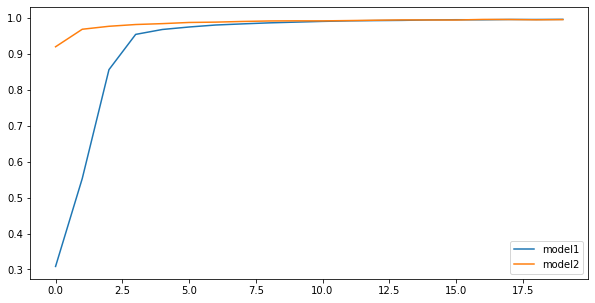

In [23]:
plt.figure(figsize=(10,5))

plt.plot(range(20),history1.history['accuracy'],label='model1')
plt.plot(range(20),history2.history['accuracy'],label='model2')

plt.legend()
plt.show()

In [24]:
# model1에서 epochs를 돌린 결과가 들어있음
# history라는 함수를 통해서 accuracy
history1.history['loss']

[1.751210428237915,
 1.0889288537661235,
 0.5087685074051221,
 0.2512601806998253,
 0.1539233210494121,
 0.11074703276554744,
 0.08568106169700622,
 0.06928911971524358,
 0.05746918261696895,
 0.046185391195863484,
 0.040626416210457685,
 0.034157935567076005,
 0.03021530294070641,
 0.02691468236471216,
 0.023126897630654276,
 0.01946408672997107,
 0.020649619556342563,
 0.017397870438235503,
 0.015980162306626636,
 0.015081549642731746]

In [25]:
# jpg > 컬러사진
# gif > 흑백사진

직접 그린 그림 불러오기

In [26]:
import PIL.Image as pimg

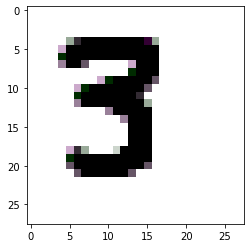

In [27]:
img_num = pimg.open('num3.gif')
plt.imshow(img_num)

In [28]:
# 28*28 2차원 데이터 > 784의 1차원 데이터로 변환
# 0 ~ 255사이의 픽셀값 > 0 ~1사이의 픽셀값-
img_num

In [29]:
num=np.array(img_num)
num

array([[251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 153,  49,   0,   0,   0,   0,   0,   0,
          0,   0,  43, 153, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 196,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [25

In [30]:
# 기존에는 흰색 > 0 검은색>255
# 지금은 흰색이 > 255 검은색 >0 
num = 255 - num

In [31]:
# 1차원 데이터로 변환
num = num.reshape(1,784)
num = num.astype('float32')/255

In [32]:
(model2.predict(num)*100).astype('int')

array([[ 0,  0,  0, 99,  0,  0,  0,  0,  0,  0]])

In [33]:
model2.predict_classes(num)

array([3], dtype=int64)

#### 모델 저장

In [34]:
model2.save('./model/model_handnum1.h5') #model폴더/파일이름.파일형식

In [35]:
#모델 불러오기
from tensorflow.keras.models import load_model

model3 = load_model('./model/model_handnum1.h5')

In [36]:
model3.evaluate(X_train,y_train)

60000/60000 [==============================] - 2s 32us/sample - loss: 0.0201 - accuracy: 0.9947


[0.020145516184974257, 0.99473333]

In [37]:
model_youngsun=load_model('./model/youngsun.h5')
model_youngsun.evaluate(X_train,y_train)

60000/60000 [==============================] - 2s 33us/sample - loss: 0.0010 - accuracy: 0.9997


[0.001041066051255196, 0.99965]

In [38]:
#딥러닝에서 교차검증
from sklearn.model_selection import KFold, cross_val_score

In [39]:
def deep_model():
    model2 = Sequential()
# 입력층, 중간층의 활성화 함수: relu
#입력층
    model2.add(Dense(units=1000, input_dim=784, activation='relu' ))
#중간층
    model2.add(Dense(units= 500, activation='relu'))
    model2.add(Dense(units=250, activation = 'relu'))
    model2.add(Dense(units=125, activation = 'relu'))
    model2.add(Dense(units=60, activation = 'relu'))
    model2.add(Dense(units=30, activation = 'relu'))
    model2.add(Dense(units=15, activation ='relu'))
# 출력층의 활성화함수: softmax
    model2.add(Dense(units=10,activation ='softmax'))

    model2.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics = ['accuracy'])
    return model2 #생성한 모델과 같은 모델을 적어줘야함

In [40]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# KerasClassifier(딥러닝 모델 함수, epochs, batch_size)
#딥러닝은 모델을 직접 설계한 것을 집어넣어야하기 때문에 함수를 만듬
model3=KerasClassifier(build_fn = deep_model, epochs = 20, batch_size = 10)

# cross_val_score(모델, 학습데이터, 정답데이터, cv = Kfold를 사용한 변수)
#
# 몇개로 어떻게 구분할건인지
#KForld(n_split = 몇개로 나눌것인지, shuffle = 데이터를 섞을건지 rnadomstate)
fold = KFold(n_splits = 5,shuffle= True,random_state=0)

score =cross_val_score(model3,X_train,y_train,cv=fold)

Train on 48000 samples
Epoch 1/20
48000/48000 [==============================] - 8s 157us/sample - loss: 0.3124 - accuracy: 0.9129
Epoch 2/20
48000/48000 [==============================] - 7s 148us/sample - loss: 0.1490 - accuracy: 0.9613
Epoch 3/20
48000/48000 [==============================] - 7s 149us/sample - loss: 0.1117 - accuracy: 0.9721
Epoch 4/20
48000/48000 [==============================] - 7s 150us/sample - loss: 0.0912 - accuracy: 0.9780
Epoch 5/20
48000/48000 [==============================] - 7s 150us/sample - loss: 0.0820 - accuracy: 0.9804
Epoch 6/20
48000/48000 [==============================] - 7s 150us/sample - loss: 0.0672 - accuracy: 0.9836
Epoch 7/20
48000/48000 [==============================] - 7s 149us/sample - loss: 0.0566 - accuracy: 0.9868
Epoch 8/20
48000/48000 [==============================] - 7s 149us/sample - loss: 0.0545 - accuracy: 0.9871
Epoch 9/20
48000/48000 [==============================] - 7s 150us/sample - loss: 0.0498 - accuracy: 0.9883
Epoch

Epoch 13/20
48000/48000 [==============================] - 7s 151us/sample - loss: 0.0418 - accuracy: 0.9912
Epoch 14/20
48000/48000 [==============================] - 7s 151us/sample - loss: 0.0389 - accuracy: 0.9917
Epoch 15/20
48000/48000 [==============================] - 7s 150us/sample - loss: 0.0397 - accuracy: 0.9920
Epoch 16/20
48000/48000 [==============================] - 7s 148us/sample - loss: 0.0360 - accuracy: 0.9928
Epoch 17/20
48000/48000 [==============================] - 7s 148us/sample - loss: 0.0429 - accuracy: 0.9914
Epoch 18/20
48000/48000 [==============================] - 7s 149us/sample - loss: 0.0409 - accuracy: 0.9916
Epoch 19/20
48000/48000 [==============================] - 7s 150us/sample - loss: 0.0355 - accuracy: 0.9934
Epoch 20/20
12000/12000 [==============================] - 1s 102us/sample - loss: 0.1799 - accuracy: 0.9787
Train on 48000 samples
Epoch 1/20
48000/48000 [==============================] - 8s 156us/sample - loss: 0.3316 - accuracy: 0.90

In [41]:
score

array([0.97816664, 0.97341669, 0.97508335, 0.97866666, 0.97025001])

### 베스트 모델 찾아서 저장하기

In [42]:
import os 
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

# 모델을 저장할 폴더명
MODEL_FOLDER = './model'

# 해당 폴더가 없다면 해당 폴더를 생성
if not os.path.exists(MODEL_FOLDER) :
    os.mkdir(MODEL_FOLDER)

In [43]:
# 저장할 파일 명 설정
 #{epoch:04d} : 반복수를 4자리로 표시
# {val_accuracy:.4f}:검증 정확도를 소수점 4째자리까지 표시
#hdf5 파일형식
modelpath = MODEL_FOLDER + './handnum-{epoch:04d}-{val_accuracy:4f}.hdf5'

In [44]:
# 베스트 모델을 찾아서 만들어둔 파일 명으로 저장
# ModelCheckpoint(filepath = 파일 경로, monitor = 기준값,save_bast_only=True)
#save_bast_only=True : 더 나은 결과값만 저장
mc = ModelCheckpoint(filepath = modelpath,
                    monitor = 'val_accuracy',
                    save_best_only = True,
                    verbose = 1) #verbose=1 진행결과를 보지 않겠다

In [45]:
# EarlyStopping(monitor,patience = 기다리는 횟수)
# patience = 20 : monitor 에 적은 기준에 따라 학습 결과가 더 나아지지 않더라도 
#20번은 돌려보겠다.
# patience가 있어야지만 조금씩 나아진 결과를 확인할 수 있다.
#EarlyStopping 한 번 안좋아지면 멈춤
es = EarlyStopping(monitor='val_accuracy',
                  patience = 20)

In [46]:
#학습
#validation_split=0.33: 전체 데이터중에서 33%를 검증데이터로 활용 평가
history = model2.fit(X_train,y_train,epochs = 1000,batch_size = 50,
                     validation_split=0.33,
                    callbacks=[mc,es])

Train on 40199 samples, validate on 19801 samples
Epoch 1/1000
40050/40199 [============================>.] - ETA: 0s - loss: 0.0128 - accuracy: 0.9971
Epoch 00001: val_accuracy improved from -inf to 0.99747, saving model to ./model./handnum-0001-0.997475.hdf5
40199/40199 [==============================] - 2s 55us/sample - loss: 0.0128 - accuracy: 0.9971 - val_loss: 0.0085 - val_accuracy: 0.9975
Epoch 2/1000
39400/40199 [============================>.] - ETA: 0s - loss: 0.0062 - accuracy: 0.9985
Epoch 00002: val_accuracy improved from 0.99747 to 0.99803, saving model to ./model./handnum-0002-0.998030.hdf5
40199/40199 [==============================] - 2s 50us/sample - loss: 0.0062 - accuracy: 0.9985 - val_loss: 0.0085 - val_accuracy: 0.9980
Epoch 3/1000
39950/40199 [============================>.] - ETA: 0s - loss: 0.0052 - accuracy: 0.9989
Epoch 00003: val_accuracy did not improve from 0.99803
40199/40199 [==============================] - 2s 49us/sample - loss: 0.0053 - accuracy: 0.9

In [47]:
#저장할려면 모델 생성부터 다시 돌려야함

In [48]:
# VGG16 모델 전이학습
from tensorflow.keras.applications import VGG16

In [49]:
conv_base = VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape=(35,35,3))

In [50]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 35, 35, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 35, 35, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 35, 35, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 17, 17, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 17, 17, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 17, 17, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     